In [32]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [33]:
#Download Data file from https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv
#file includes Covid deaths by date reported for each province

url = 'https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv'
r = requests.get(url)

#save file
with open('covid19-download.csv', 'wb') as f:
    f.write(r.content)

In [115]:
#read file into data frame, pivot to new cases per day with provinces as columns   
cancovid19deaths = pd.read_csv("covid19-download.csv", index_col = 'date', parse_dates = True)
cancovid19deaths = pd.pivot_table(cancovid19deaths, values='numdeathstoday', index='date',columns='prname')

#rename columns 
cancovid19deaths.columns = ['Alta','BC','Canada','Man','NB','NL','NWT','NS','Nvt','Ont','PEI','Que','Travellers','Sask','YT']

#extract Alberta deaths and resample by month
ABCovidDeaths = cancovid19deaths.Alta.resample('M', axis = 0, label = 'right', closed = 'right').sum()

In [116]:
#remove incomplete month
#ABCovidDeaths.drop(pd.Timestamp('2021-01-31'), inplace = True)

#change index period to month
ABCovidDeaths.index = ABCovidDeaths.index.to_period('M')
ABCovidDeaths.name = 'Covid'

In [125]:
#read in other Alberta causes of death from canism table(edited)

ABcausedeath = pd.read_csv("1310078501-eng.csv", index_col = 'Date') #Statistics Canada. Table 13-10-0785-01 Selected grouped causes of death, by month
ABcausedeath = ABcausedeath.transpose()

#format Alberta cause of death data 

ABcausedeath = ABcausedeath.apply(pd.to_numeric, errors='coerce')
ABcausedeath.index = pd.to_datetime(ABcausedeath.index, format = '%y-%b')
ABcausedeath.drop(columns = ['Total', 'COVID19'], axis = 1, inplace = True)


<Figure size 432x288 with 0 Axes>

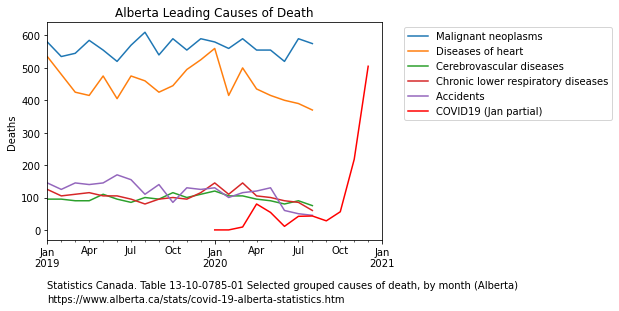

In [128]:
#plot monthly Covid deaths in Alberta vs other leading causes

plt.figure()
ax = ABcausedeath.plot(ylabel = "Deaths")
ax = ABCovidDeaths.plot(color = 'red')

plt.xlim('2019-01','2021-01')
plt.xlabel('')
plt.title('Alberta Leading Causes of Death')

plt.figtext(0.5, 0.01, "", ha="left", fontsize=8, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.annotate('Statistics Canada. Table 13-10-0785-01 Selected grouped causes of death, by month (Alberta)', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('https://www.alberta.ca/stats/covid-19-alberta-statistics.htm', (0,0), (0, -54), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left').get_texts()[5].set_text('COVID19 (Jan partial)')

plt.savefig('AlbertaDeaths')